In [3]:
import numpy as np
import pandas as pd

# Generate random data for testing
np.random.seed(0)  # for reproducibility
num_samples = 100
num_features = 2

# Generate random data points
data = np.random.rand(num_samples, num_features)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Save DataFrame to CSV file
df.to_csv('test_data.csv', index=False)

print("CSV file 'test_data.csv' has been generated successfully.")


CSV file 'test_data.csv' has been generated successfully.


K-means labels:
[1 1 2 2 1 1 1 0 2 1 1 2 2 2 0 2 2 2 1 1 2 0 1 0 0 1 0 0 0 0 0 0 2 0 0 1 1
 0 0 0 2 2 0 0 1 2 2 0 0 0 0 1 2 1 2 2 0 1 1 1 1 1 2 2 0 1 2 1 1 1 1 2 1 2
 1 2 2 2 1 0 1 1 1 2 0 0 0 0 2 0 2 0 1 1 0 0 2 1 0 2]
EM labels:
[2 2 2 2 2 2 2 0 1 2 2 2 1 1 2 1 2 1 2 2 2 0 2 0 2 2 0 0 2 0 0 0 1 0 0 2 2
 0 0 0 2 1 2 0 2 2 1 0 0 0 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1
 2 1 1 1 2 0 2 2 2 1 0 0 0 2 2 0 1 2 2 2 2 0 1 2 1 1]


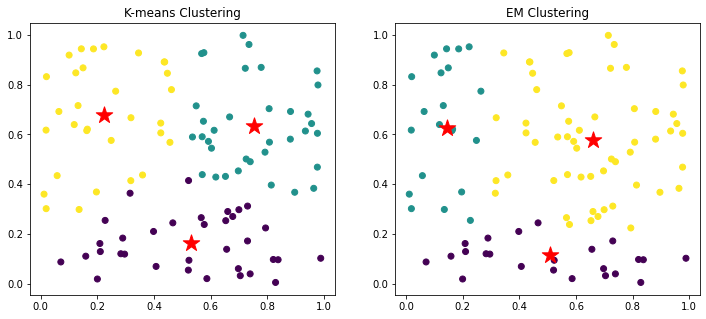

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv('test_data.csv')

# Visualize the dataset if needed
# plt.scatter(data['X'], data['Y'])
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# Convert the dataset to numpy array
X = data.values

# Number of clusters
k = 3

# K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# EM clustering
em = GaussianMixture(n_components=k)
em.fit(X)
em_labels = em.predict(X)
em_centers = em.means_

# Compare clustering results
print("K-means labels:")
print(kmeans_labels)
print("EM labels:")
print(em_labels)

# Visualize clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='*', s=300, c='r')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=em_labels, cmap='viridis')
plt.scatter(em_centers[:, 0], em_centers[:, 1], marker='*', s=300, c='r')
plt.title('EM Clustering')

plt.show()
